In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

### 데이터 준비

In [6]:
## iris 데이터셋 로드
iris = load_iris()
x = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='Species')

## 목표 변수(Species)를 제거하여 클러스터링 데이터 생성
iris2 = x.copy()

### K-means 클러스터링

In [7]:
## 군집 내 제곱합과 군집 간 제곱합을 저장할 리스트
km_out_within = []
km_out_between = []

In [8]:
## 2. 군집 수 k=2~7까지 변화시켜가며 클러스터링
for i in range(2, 8):
    kmeans = KMeans(n_clusters=i, random_state=1, n_init=25)
    kmeans.fit(iris2)
    ## 군집 내 제곱합 (Within-Cluster Sum of Squares)
    km_out_within.append(kmeans.inertia_)  
    ## 군집 간 제곱합 (Between-Cluster Sum of Squares) 계산
    # Total = WSS + BSS
    Total = ((iris2 - iris2.mean())**2).sum().sum()
    bss = Total - kmeans.inertia_
    km_out_between.append(bss)

## 결과를 데이터프레임으로 저장
km_summary = pd.DataFrame({
    'km_out_within': km_out_within,
    'km_out_between': km_out_between
}, index=range(2,8))

In [9]:
## 군집 수별 군집 내 제곱합과 군집 간 제곱합
km_summary

,km_out_within,km_out_between
2,152.347952,529.022648
3,78.851441,602.519159
4,57.228473,624.142127
5,46.446182,634.924418
6,39.039987,642.330613
7,34.305815,647.064785


In [11]:
## 클러스터 수 k=3으로 K-평균 클러스터링
k = 3
kmeans_k3 = KMeans(n_clusters=k, random_state=1, n_init=25)
kmeans_k3.fit(iris2)

KMeans(n_clusters=3, n_init=25, random_state=1)

In [12]:
## 클러스터 수 k=3의 클러스터 중심점
pd.DataFrame(kmeans_k3.cluster_centers_, columns=iris.feature_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.901613,2.748387,4.393548,1.433871
1,5.006000,3.428000,1.462000,0.246000
2,6.850000,3.073684,5.742105,2.071053


In [13]:
## 각 관측치의 클러스터 할당
kmeans_k3.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [15]:
## 각 클러스터의 데이터 관측치 개수
pd.Series(kmeans_k3.labels_).value_counts().sort_index()

0    62
1    50
2    38
Name: count, dtype: int64

In [16]:
## 클러스터링 결과와 실제 Species 간의 혼동 행렬
conf_mat = confusion_matrix(kmeans_k3.labels_, y)
conf_mat

array([[ 0, 48, 14],
       [50,  0,  0],
       [ 0,  2, 36]], dtype=int64)

### 클러스터링 결과 시각화

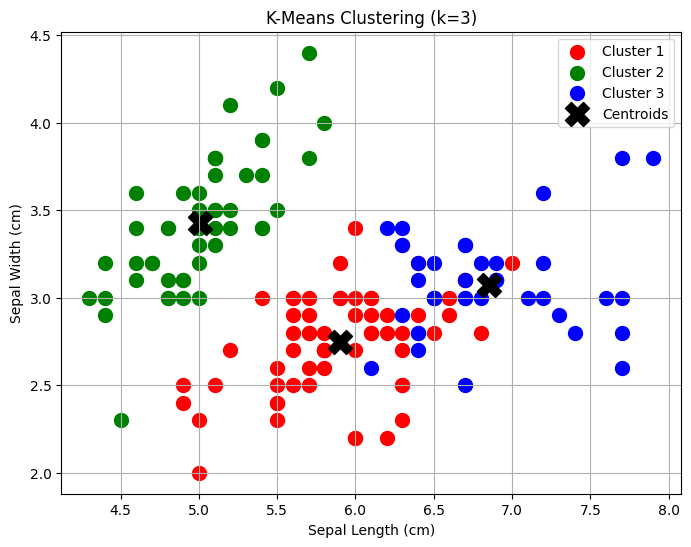

In [19]:
plt.figure(figsize=(8,6))
colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow']

for cluster in range(k):
    plt.scatter(
        iris2.iloc[kmeans_k3.labels_ == cluster, 0], 
        iris2.iloc[kmeans_k3.labels_ == cluster, 1], 
        s=100, 
        c=colors[cluster],
        label=f'Cluster {cluster+1}',
        marker='o'
    )

## 클러스터 중심점 표시
plt.scatter(
    kmeans_k3.cluster_centers_[:, 0], 
    kmeans_k3.cluster_centers_[:, 1], 
    s=300, 
    c='black', 
    marker='X', 
    label='Centroids'
)

plt.title('K-Means Clustering (k=3)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.grid(True)
plt.show()